A quick reminder of the columns in the CAS sample dataframe:

In [65]:
cas_sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
trvl_acct_email_addr                             1000 non-null object
total_number_net_bookings_all_time               1000 non-null int64
total_number_visits_all_time                     1000 non-null int64
total_number_net_room_night_all_time             1000 non-null int64
total_net_gbv_all_time                           1000 non-null float64
total_net_gp_all_time                            1000 non-null float64
average_gbv_all_time                             1000 non-null float64
average_number_days_between_bookings_all_time    1000 non-null float64
average_length_of_stay_all_time                  1000 non-null float64
average_booking_window_all_time                  1000 non-null float64
average_daily_rate_all_time                      1000 non-null float64
most_booked_posa_all_time                        1000 non-null object
loyalty_account_tier                             1

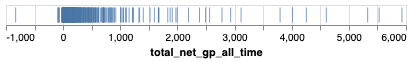

In [67]:
alt.Chart(cas_sample_df).mark_tick().encode(
    x='total_net_gp_all_time'
) # note any outliers that might affect binning and aggregation later

Another way to represent this data is in the form of a histogram (show count of binned x data along y). Instead of having a method like hist(), binning and aggregation is made part of the API.

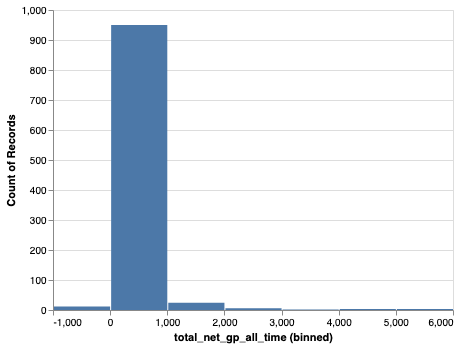

In [68]:
alt.Chart(cas_sample_df).mark_bar().encode(
    x=alt.X('total_net_gp_all_time',bin=True), # use alt.X() to encode the x channel with multiple parameters
    y='count()' # Altair has built-in syntax for aggregation which is specified within the column identifier
)

If we want more control over the bins, we can use alt.Bin to adjust bin parameters

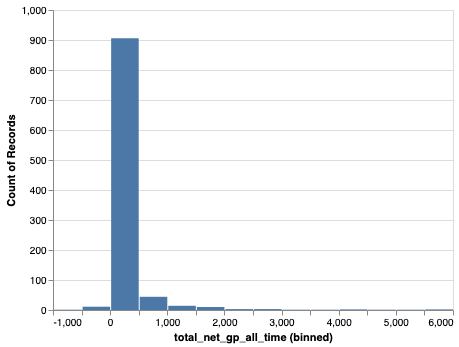

In [69]:
alt.Chart(cas_sample_df).mark_bar().encode(
    x=alt.X('total_net_gp_all_time',bin=alt.Bin(maxbins=30)),
    y='count()'
)

If we apply another encoding (such as color), the data will be automatically grouped within each bin:

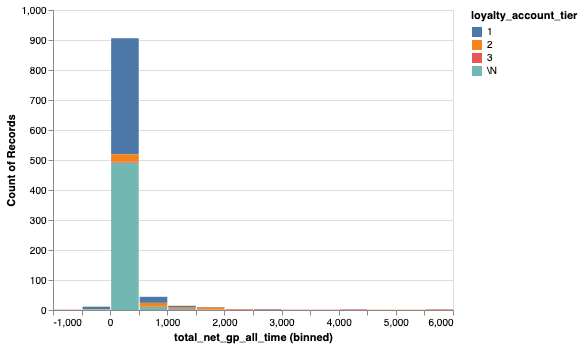

In [70]:
alt.Chart(cas_sample_df).mark_bar().encode(
    x=alt.X('total_net_gp_all_time',bin=alt.Bin(maxbins=30)),
    y='count()',
    color='loyalty_account_tier'
)

If you prefer a separate plot for each category, the column encoding can help:

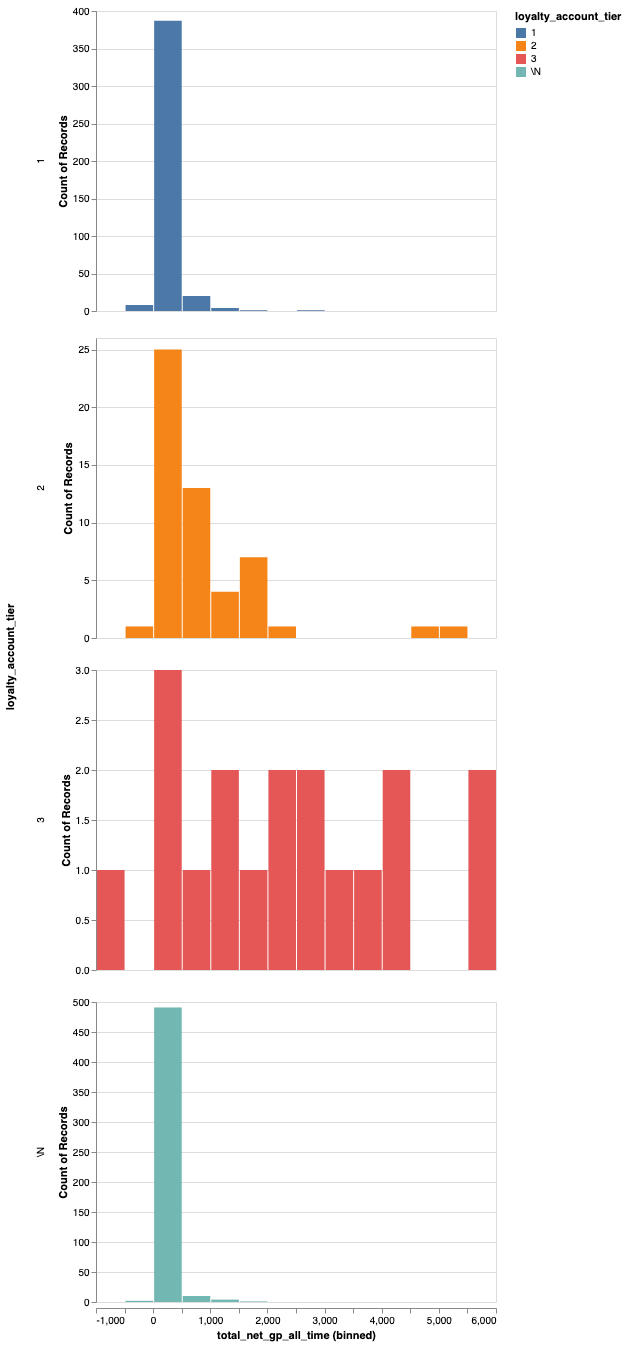

In [79]:
alt.Chart(cas_sample_df).mark_bar().encode(
    x=alt.X('total_net_gp_all_time',bin=alt.Bin(maxbins=30)),
    y='count()',
    color='loyalty_account_tier',
    row='loyalty_account_tier'
).resolve_scale(y='independent')

Binning and aggregation works in two dimensions as well; we can use the rect marker and visualize the count using the color.

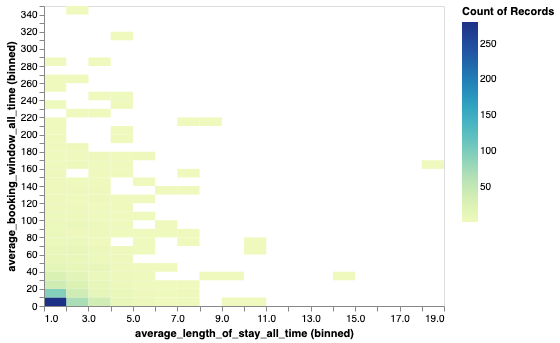

In [75]:
alt.Chart(cas_sample_df).mark_rect().encode(
    x=alt.X('average_length_of_stay_all_time', bin=alt.Bin(maxbins=30)),
    y=alt.Y('average_booking_window_all_time', bin=alt.Bin(maxbins=50)),
    color='count()'
)

Aggregations can be more than simple counts; we can also aggregate and compute the mean of a third quantity within each bin.

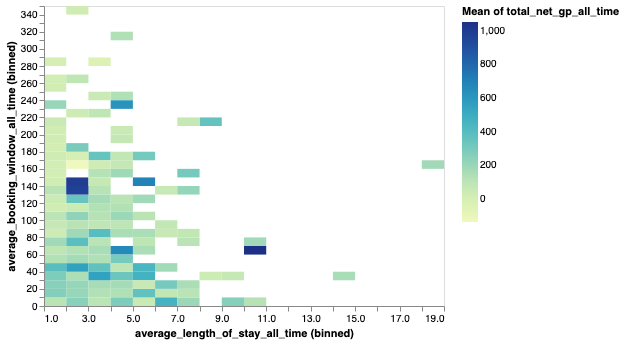

In [77]:
alt.Chart(cas_sample_df).mark_rect().encode(
    x=alt.X('average_length_of_stay_all_time', bin=alt.Bin(maxbins=30)),
    y=alt.Y('average_booking_window_all_time', bin=alt.Bin(maxbins=50)),
    color='mean(total_net_gp_all_time)'
)

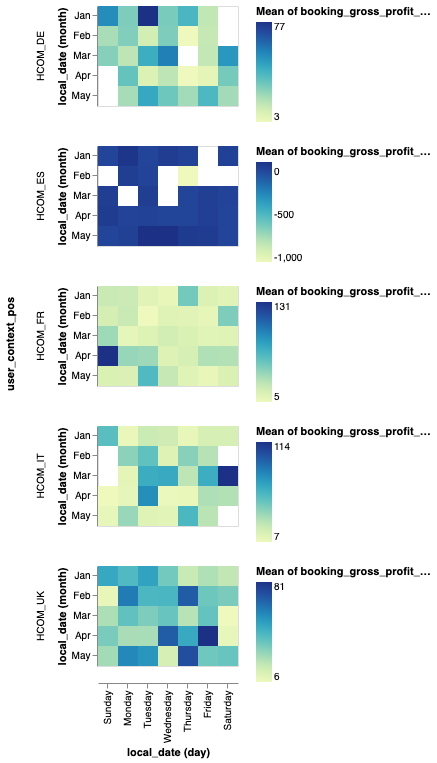

In [80]:
alt.Chart(bkg_sample_df).mark_rect().encode(
    y=alt.Y('local_date', timeUnit='month'),
    x=alt.X('local_date', timeUnit='day'),
    color='mean(booking_gross_profit_amount_usd)',
    row='user_context_pos'
).resolve_scale(color='independent')

In [90]:
bkg_sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
local_date                         1000 non-null object
customer_account_id                1000 non-null object
bkg_id                             1000 non-null int64
booking_itin_number                1000 non-null int64
bkg_date_gmt                       1000 non-null object
bkg_timestamp                      1000 non-null object
booking_gross_profit_amount_usd    1000 non-null float64
gross_booking_value_usd            1000 non-null float64
room_nights                        1000 non-null int64
guid                               1000 non-null object
supplier_property_id               1000 non-null int64
user_context_pos                   1000 non-null object
brand_name                         1000 non-null object
booking_platform                   1000 non-null object
booking_device                     1000 non-null object
visit_number                       1000 non-null int64
v

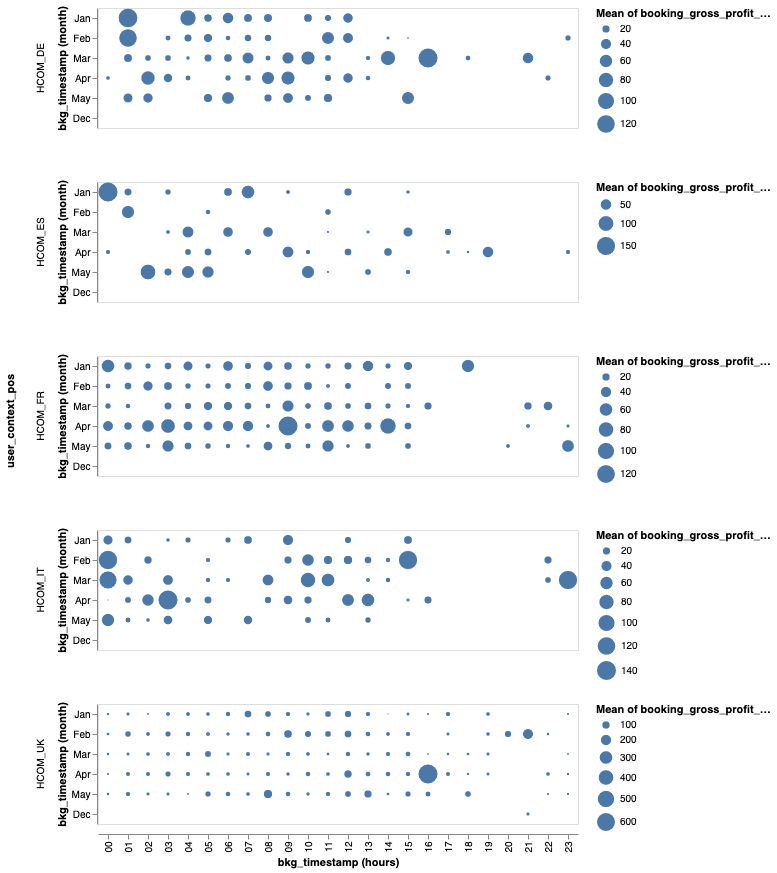

In [97]:
alt.Chart(bkg_sample_df[bkg_sample_df.booking_gross_profit_amount_usd > -500]).mark_circle().encode(
    y=alt.Y('bkg_timestamp', timeUnit='month'),
    x=alt.X('bkg_timestamp', timeUnit='hours'),
    size='mean(booking_gross_profit_amount_usd)',
    row='user_context_pos'
).resolve_scale(size='independent')